# Comcast Telecom Complaints
A project by Simplilearn

DESCRIPTION

Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.

Data Dictionary

Ticket #: Ticket number assigned to each complaint
Customer Complaint: Description of complaint
Date: Date of complaint
Time: Time of complaint
Received Via: Mode of communication of the complaint
City: Customer city
State: Customer state
Zipcode: Customer zip
Status: Status of complaint
Filing on behalf of someone
Analysis Task

To perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, matplotlib, and BeautifulSoup.

- Import data into Python environment.
- Provide the trend chart for the number of complaints at monthly and daily granularity levels.
- Provide a table with the frequency of complaint types.
- Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
- Which state has the maximum complaints
- Which state has the highest percentage of unresolved complaints
- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

## Import data into Python environment.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Function to display all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('Comcast_telecom_complaints_data.csv')
df.shape

(2224, 11)

In [4]:
df.head(5)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
Ticket #                       2224 non-null object
Customer Complaint             2224 non-null object
Date                           2224 non-null object
Date_month_year                2224 non-null object
Time                           2224 non-null object
Received Via                   2224 non-null object
City                           2224 non-null object
State                          2224 non-null object
Zip code                       2224 non-null int64
Status                         2224 non-null object
Filing on Behalf of Someone    2224 non-null object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [6]:
#Checking null values
df.describe(include = 'object')

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Status,Filing on Behalf of Someone
count,2224,2224,2224,2224,2224,2224,2224,2224,2224,2224
unique,2224,1841,91,91,2190,2,928,43,4,2
top,370440,Comcast,24-06-15,24-Jun-15,11:43:14 AM,Customer Care Call,Atlanta,Georgia,Solved,No
freq,1,83,218,218,2,1119,63,288,973,2021


## Provide the trend chart for the number of complaints at monthly and daily granularity levels.

Conversion of 'Date' column from object to datetime64

In [7]:
df.dtypes

Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

In [8]:
df['Date'] = pd.to_datetime(df.Date)

In [9]:
df.dtypes

Ticket #                               object
Customer Complaint                     object
Date                           datetime64[ns]
Date_month_year                        object
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
dtype: object

Successfully converted 'Date' object to datetime64

### Let us now provide the trend chart for the number of complaints at a daily granularity level.

In [10]:
date_complaint = pd.crosstab(index = df["Date"], columns="Customer Complaint")     

date_complaint 

col_0,Customer Complaint
Date,
2015-04-01,18
2015-04-02,27
2015-04-03,15
2015-04-04,12
2015-04-05,6
2015-04-06,13
2015-04-07,25
2015-04-08,28
2015-04-09,21


The trend chart of the number of complaints per day in a line plot

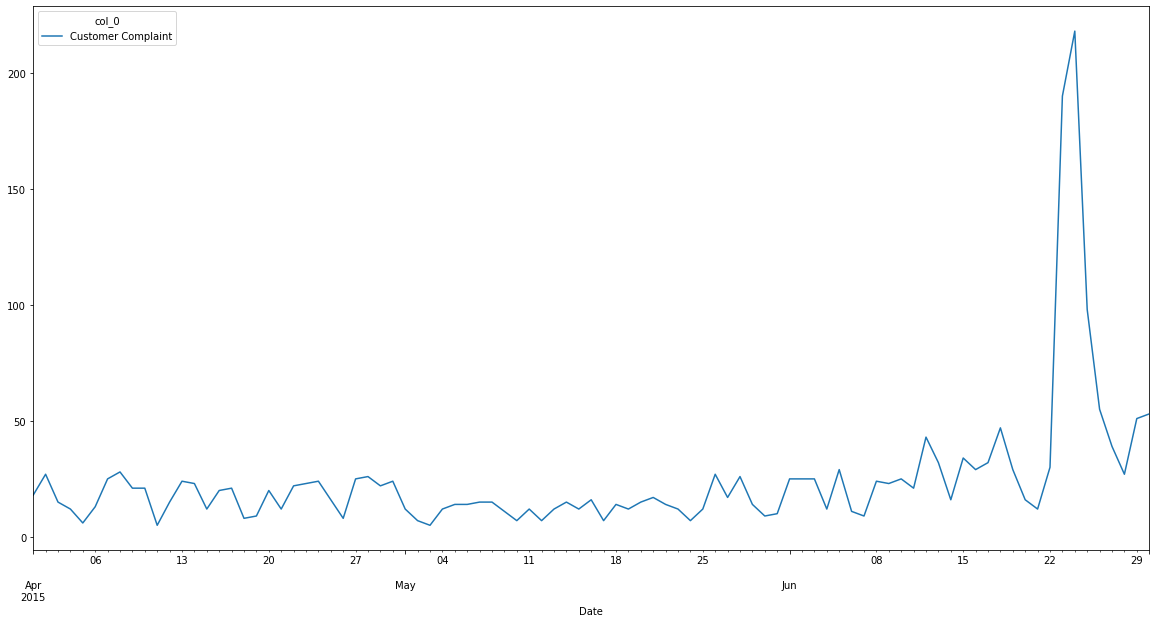

In [11]:
date_complaint.plot.line(figsize=(20,10))

The trend chart of the number of complaints per day in a bar plot

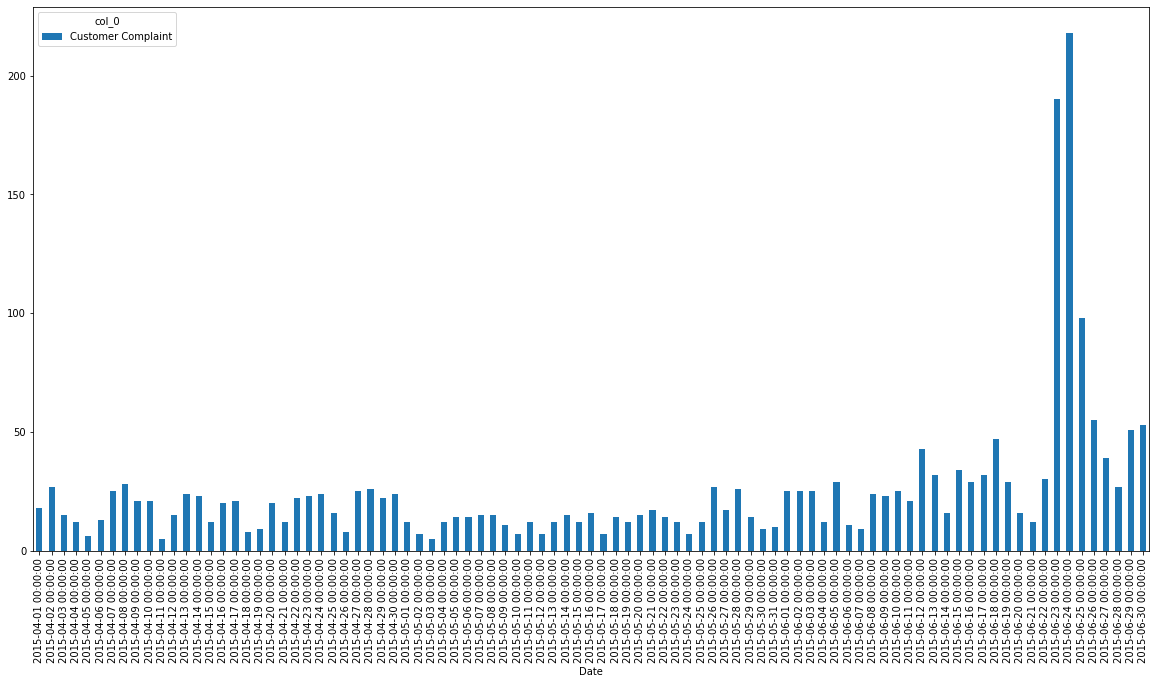

In [12]:
date_complaint.plot.bar(figsize=(20,10))

### Let us now provide the trend chart for the number of complaints at a monthly granularity level.

First, we need to create a new column for Month and Year associated with the Date column

In [13]:
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year

In [14]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,Year
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,2015
1,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,4,2015
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,2015
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,5,2015
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,2015


Number of complaints per month:

Note:

4 is the month of April,  

5 is the month of May, 

6 is the month of June, 


In [15]:
my_tab_month = pd.crosstab(index = df['Month'], columns="Customer Complaint")      

my_tab_month

col_0,Customer Complaint
Month,
4,545
5,399
6,1280


As we can observe, the month of June has the most complaints

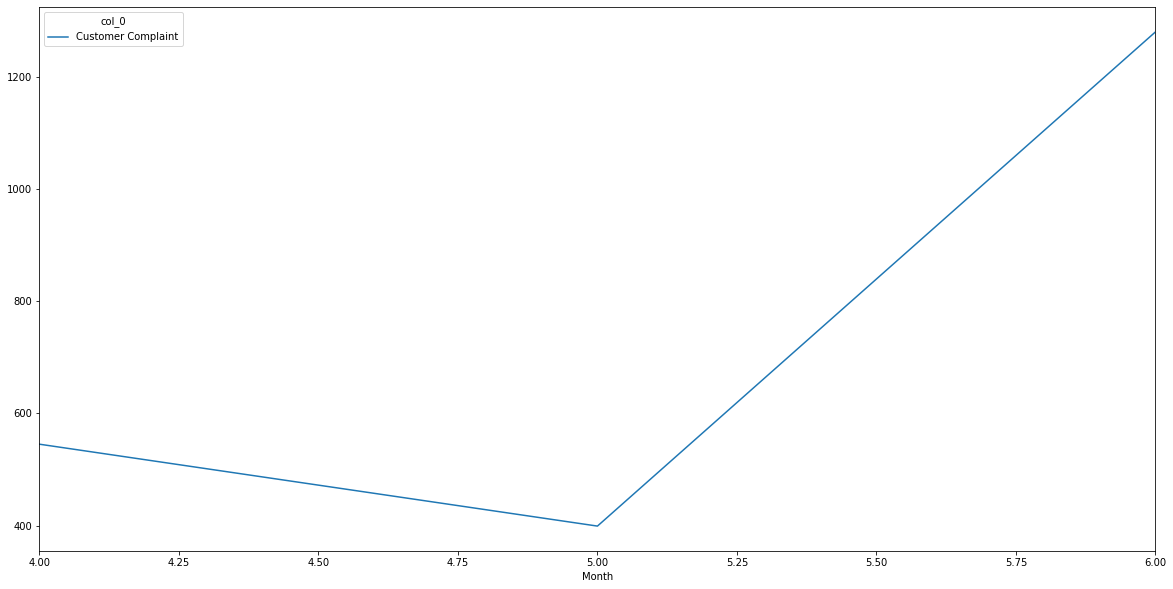

In [16]:
my_tab_month.plot.line(figsize=(20,10))

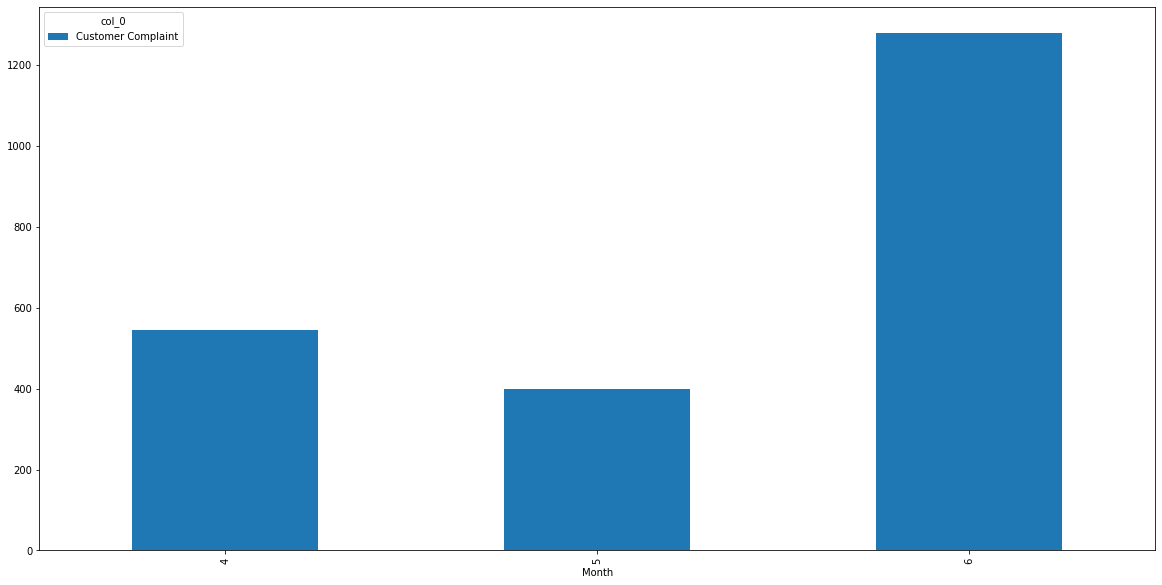

In [17]:
my_tab_month.plot.bar(figsize=(20,10))

### Provide a table with the frequency of complaint types.

In [18]:
df['Customer Complaint'].value_counts()

Comcast                                                                                                                                                83
Comcast Internet                                                                                                                                       18
Comcast Data Cap                                                                                                                                       17
comcast                                                                                                                                                13
Comcast Data Caps                                                                                                                                      11
Comcast Billing                                                                                                                                        11
Data Caps                                                                   

### Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

In [19]:
print('The most that the customer has complained about is:')
df['Customer Complaint'].value_counts()[:1]
# Note: more Data Cleaning is required to have an accurate analysis

The most that the customer has complained about is:


Comcast    83
Name: Customer Complaint, dtype: int64

In [20]:
print('The top 10 customer complaints are:')
df['Customer Complaint'].value_counts()[:10]

The top 10 customer complaints are:


Comcast                     83
Comcast Internet            18
Comcast Data Cap            17
comcast                     13
Comcast Data Caps           11
Comcast Billing             11
Data Caps                   11
Unfair Billing Practices     9
Comcast internet             8
Data Cap                     8
Name: Customer Complaint, dtype: int64

### Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [21]:
df['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

We can see that the 'Status' column has 4 categories, we now need to replace the categories from Open & Pending as Open and Closed & Solved as Closed

In [22]:
df['Status'].head(20)

0      Closed
1      Closed
2      Closed
3        Open
4      Solved
5      Solved
6     Pending
7      Solved
8      Closed
9        Open
10     Closed
11     Closed
12       Open
13     Solved
14     Solved
15    Pending
16     Solved
17     Closed
18     Closed
19     Closed
Name: Status, dtype: object

This function will replace the categories to what is required

In [23]:
df["Status"]= df["Status"].replace('Pending', 'Open')
df["Status"]= df["Status"].replace('Solved', 'Closed')

In [24]:
df['Status'].unique()

array(['Closed', 'Open'], dtype=object)

As you can see, we have successfully replaced what is required

In [25]:
df['Status'].head(20)

0     Closed
1     Closed
2     Closed
3       Open
4     Closed
5     Closed
6       Open
7     Closed
8     Closed
9       Open
10    Closed
11    Closed
12      Open
13    Closed
14    Closed
15      Open
16    Closed
17    Closed
18    Closed
19    Closed
Name: Status, dtype: object

### Provide insights on:
- Which state has the maximum complaints
- Which state has the highest percentage of unresolved complaints
- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [26]:
print('The maximum complaints received from a state is from:',df['State'].value_counts().idxmax()) 

The maximum complaints received from a state is from: Georgia


This shows you how many complaints are associated with each state (visualized by a bar chart).

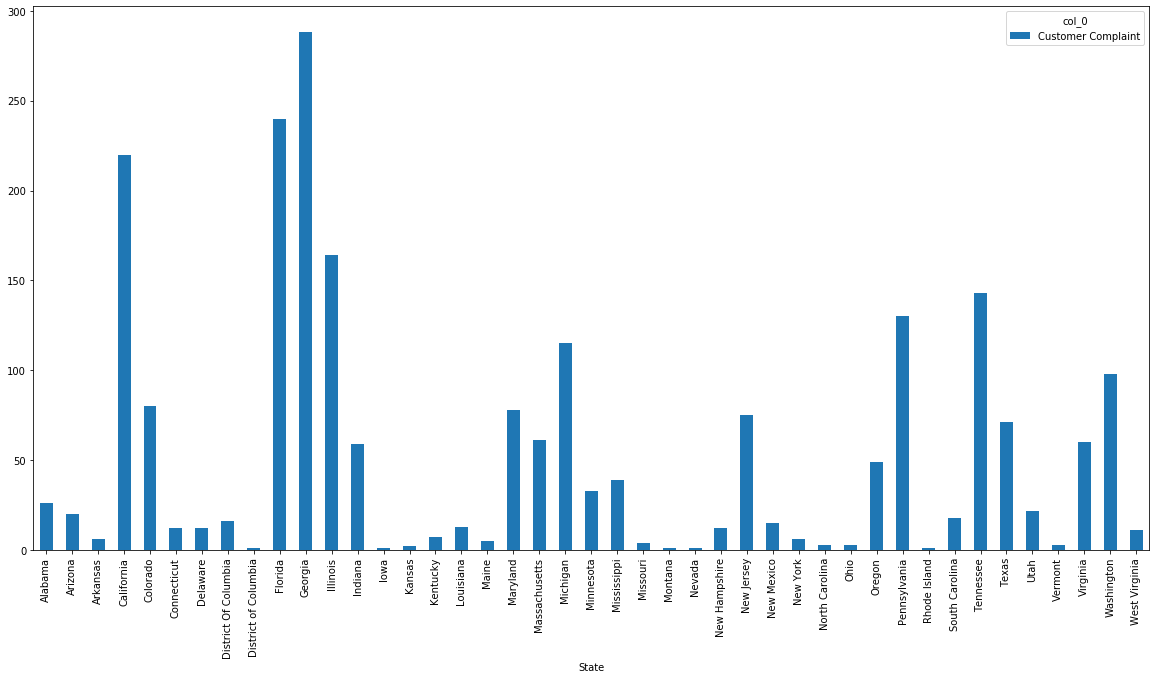

In [27]:
state_max_complaints = pd.crosstab(index = df['State'], columns="Customer Complaint")     
state_max_complaints.plot.bar(stacked = True,figsize=(20,10))

Now presented in a table format

In [28]:
state_max_complaints

col_0,Customer Complaint
State,
Alabama,26
Arizona,20
Arkansas,6
California,220
Colorado,80
Connecticut,12
Delaware,12
District Of Columbia,16
District of Columbia,1


### Which state has the highest percentage of unresolved complaints?
Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [29]:
print('The state with the highest percentage of unresolved complaints is',\
       df.groupby('Status')['State'].value_counts()['Open'].idxmax(),\
      ', with', df.groupby('Status')['State'].value_counts()['Open'].max(),\
      'unresolved complaints out of', df.groupby('Status')['State'].count()['Open'].sum(),\
      'which comprises of', 80 / 517 * 100, '% of unresolved complaints compared to other states' )

The state with the highest percentage of unresolved complaints is Georgia , with 80 unresolved complaints out of 517 which comprises of 15.473887814313347 % of unresolved complaints compared to other states


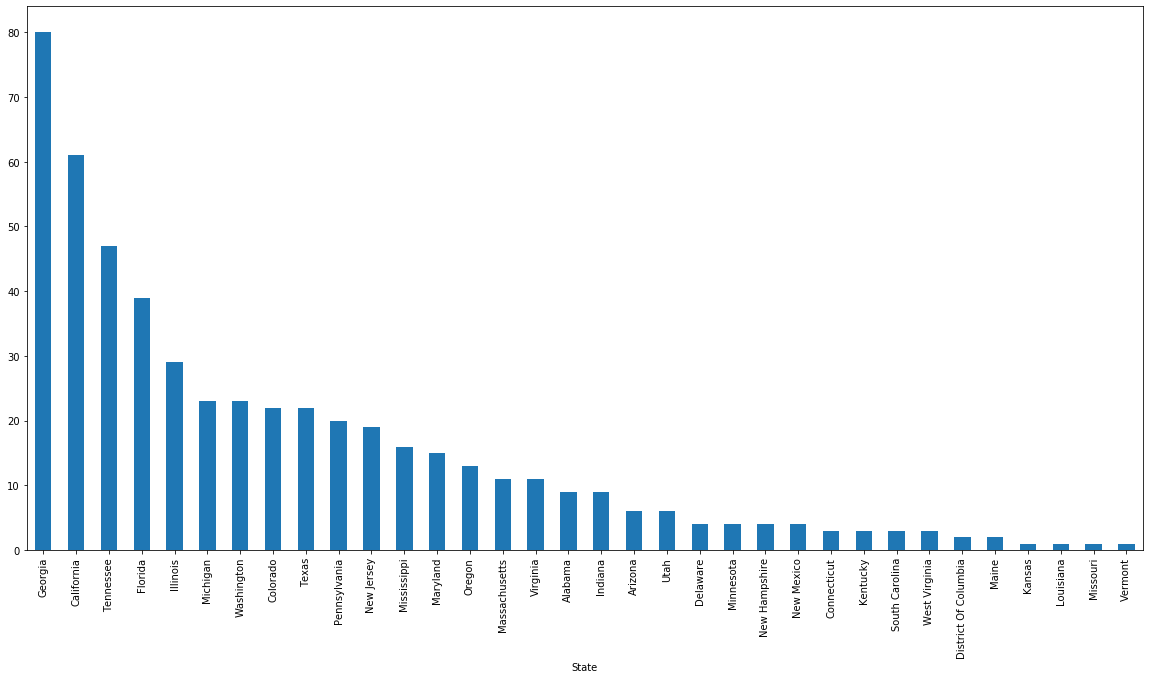

In [30]:
status_state = df.groupby('Status')['State'].value_counts()['Open']
status_state.plot.bar(stacked = True,figsize=(20,10))

### Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [31]:
print('Out of', df.groupby(['Status','State'])['Received Via'].value_counts().sum(),\
      'complaints received through the internet and customer care calls,',\
       df.groupby(['Status','State'])['Received Via'].value_counts()['Closed'].sum(),'(', 1707 / 2224 * 100, '%)'\
      ' were resolved and', df.groupby(['Status','State'])['Received Via'].value_counts()['Open'].sum(),'(', 517 / 2224 * 100, '%)'\
      ' were not resolved')

Out of 2224 complaints received through the internet and customer care calls, 1707 ( 76.75359712230215 %) were resolved and 517 ( 23.246402877697843 %) were not resolved


This bar chart shows the number of complaints that were resolved and unresolved associated with the method of how the complaint was received.

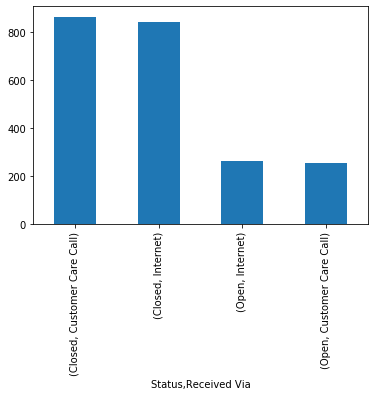

In [32]:
status_received = df.groupby('Status')['Received Via'].value_counts()
status_received.plot.bar()

In [33]:
status_received

Status  Received Via      
Closed  Customer Care Call    864
        Internet              843
Open    Internet              262
        Customer Care Call    255
Name: Received Via, dtype: int64

This table shows the breakdown of the status of complaints in each state and it also displays the breakdown of how many were received through the internet and cutomer calls

In [34]:
df.groupby(['Status','State'])['Received Via'].value_counts()

Status  State                 Received Via      
Closed  Alabama               Internet               10
                              Customer Care Call      7
        Arizona               Internet                9
                              Customer Care Call      5
        Arkansas              Customer Care Call      3
                              Internet                3
        California            Customer Care Call     83
                              Internet               76
        Colorado              Customer Care Call     34
                              Internet               24
        Connecticut           Internet                6
                              Customer Care Call      3
        Delaware              Internet                7
                              Customer Care Call      1
        District Of Columbia  Customer Care Call      9
                              Internet                5
        District of Columbia  Internet                1

Now visualized in a bar chart

In [35]:
status_state_received_closed = df.groupby(['Status','State'])['Received Via'].value_counts()['Closed']
status_state_received_open = df.groupby(['Status','State'])['Received Via'].value_counts()['Open']

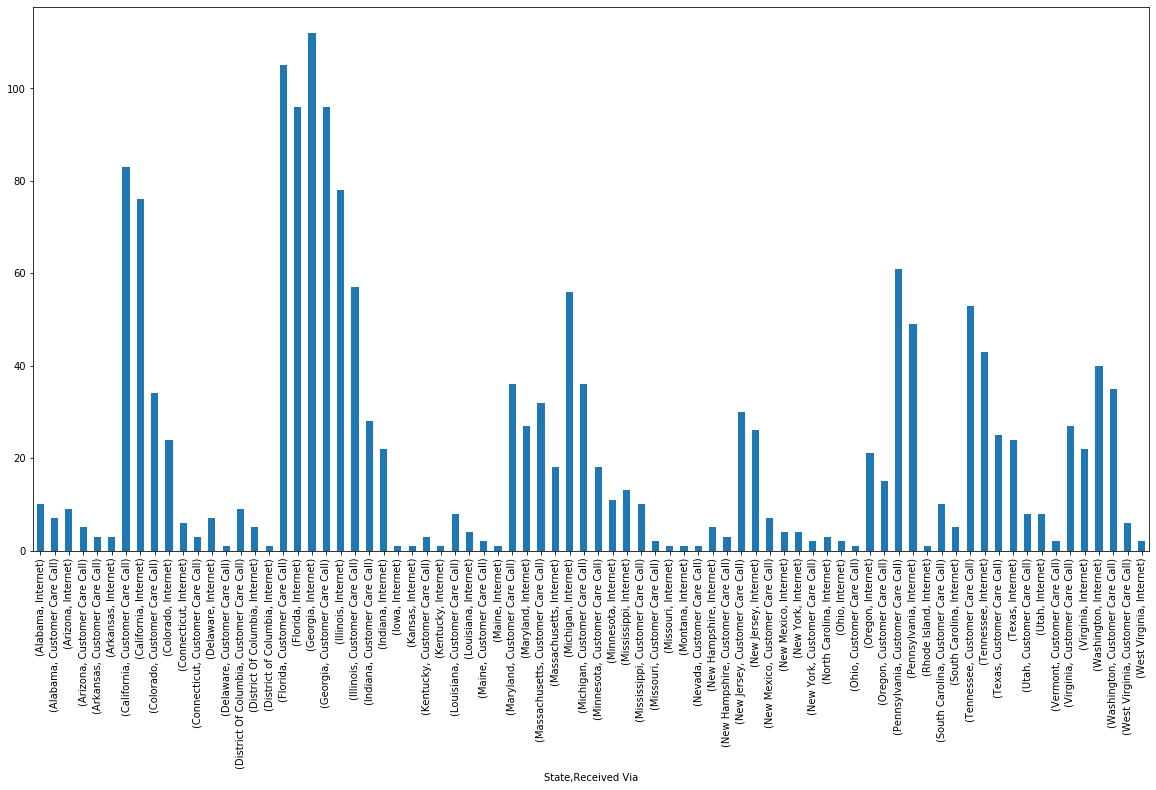

In [36]:
status_state_received_closed.plot.bar(figsize=(20,10))

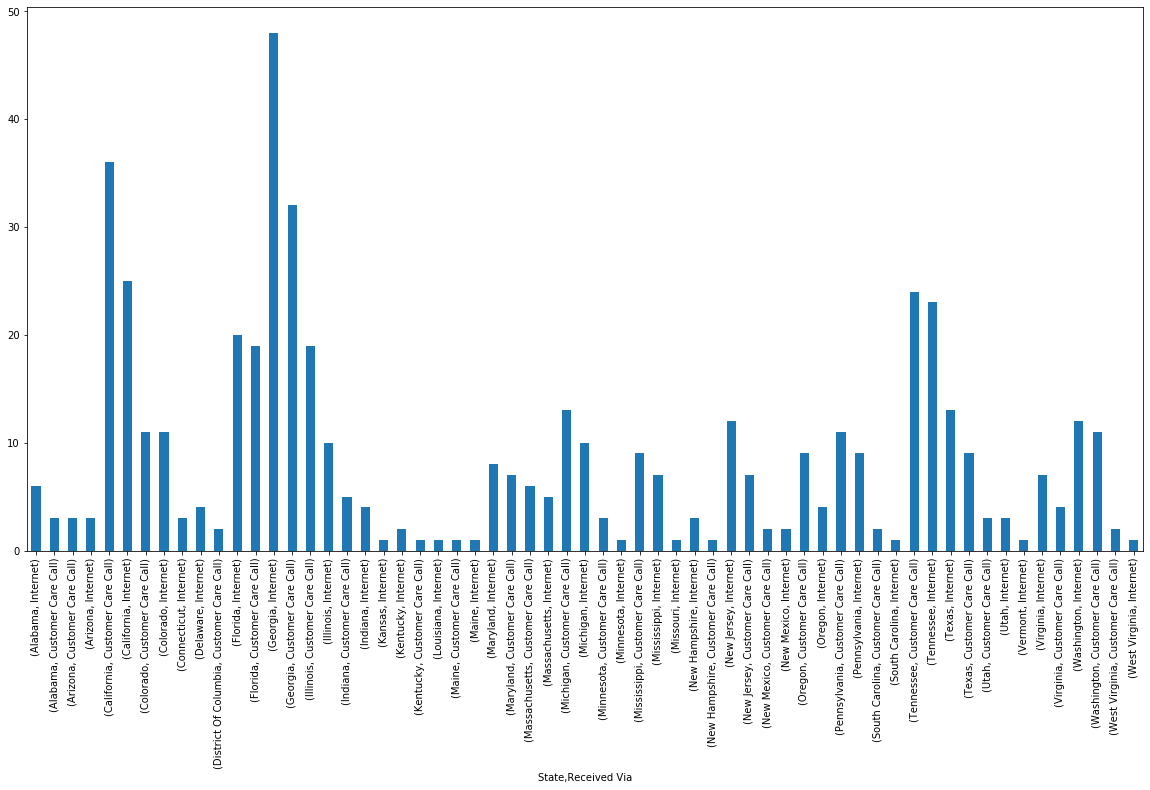

In [37]:
status_state_received_open.plot.bar(figsize=(20,10))